In [ ]:
import numpy as np # May be used for data analysis and helps to import various data files (CSV file)
import pandas as pd # basic level external library used for complex mathematics operations
import seaborn as sns # data visualization library
import matplotlib.pyplot as plt


df = pd.read_csv("Mall_Customers.csv")
df.head() # Will show the top 5 data records
#df.tail() #  Will show the bottom 5 data records

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape
 # Will show the number of rows and columns (i.e,shape)

(200, 5)

In [ ]:
df.info() # Will show the type of data(int,float,string,double) and memory usage of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Extracting data from df and retreving data into X
X = df.iloc[:,[3,4]].values
X

# -----------------------------------
# This is all about data understanding


array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

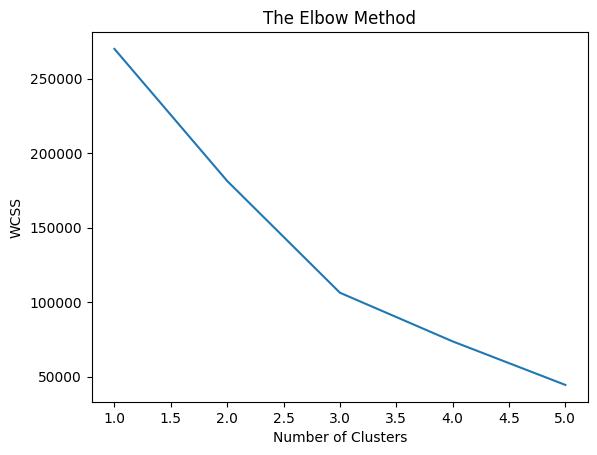

In [ ]:
# -----------------------------------
# Now perform elbow method to find  no.of clusters

from sklearn.cluster import KMeans
wcss = [] # Within Clusters Sum os Squares

for i in range(1,6):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 0)
#  Sets the number of clusters to i in the current iteration.
# Uses the K-Means++ initialization method to choose initial cluster centers that improve convergence
  m=kmeans.fit(X)
  wcss.append(kmeans.inertia_)


plt.plot(range (1 , 6), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


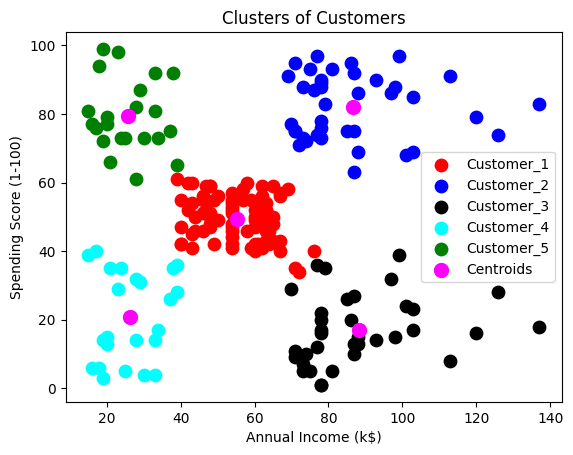

In [ ]:
kmeansmodel = KMeans(n_clusters = 5 , init = 'k-means++',random_state = 0)
y_kmeans = kmeansmodel.fit_predict(X)



plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1], s = 80 , c = 'red',label = 'Customer_1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1], s = 80 , c = 'blue',label = 'Customer_2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1], s = 80 , c = 'black',label = 'Customer_3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1], s = 80 , c = 'cyan',label = 'Customer_4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1], s = 80 , c = 'green',label = 'Customer_5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1] , s = 100, c='magenta', label ='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()